In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
from PIL import Image
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model, Sequential;
from tensorflow.keras.layers import Input, Activation,GlobalAveragePooling2D,TimeDistributed, GlobalAveragePooling1D,Add, BatchNormalization, Flatten, Dense, Conv2D, MaxPool2D , Flatten, Dropout, concatenate, ReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from imblearn.over_sampling import RandomOverSampler
import tensorflow.keras.backend as K
from tensorflow.keras.applications import ResNet50, ResNet50V2, DenseNet201, DenseNet169
from keras.applications.vgg16 import VGG16
tf.config.run_functions_eagerly(True)

In [ ]:
K.clear_session()
import gc

# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

In [ ]:
tf.__version__

'2.16.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
random.seed(10)
tf.random.set_seed(10)


In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
tf.test.gpu_device_name()

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



'/device:GPU:0'

In [ ]:
X_train1 = np.load('/content/drive/MyDrive/data/X_train_1.npy', mmap_mode = 'r')
X_train2 = np.load('/content/drive/MyDrive/data/X_train_2.npy', mmap_mode = 'r')
X_train3 = np.load('/content/drive/MyDrive/data/X_train_3.npy', mmap_mode = 'r')
X_train4 = np.load('/content/drive/MyDrive/data/X_train_4.npy', mmap_mode = 'r')
X_train5 = np.load('/content/drive/MyDrive/data/X_train_5.npy', mmap_mode = 'r')
X_train6 = np.load('/content/drive/MyDrive/data/X_train_6.npy', mmap_mode = 'r')
y_train1 = pd.read_csv('/content/drive/MyDrive/data/y_train1.csv')
y_train2 = pd.read_csv('/content/drive/MyDrive/data/y_train2.csv')
y_train3 = pd.read_csv('/content/drive/MyDrive/data/y_train3.csv')
y_train4 = pd.read_csv('/content/drive/MyDrive/data/y_train4.csv')
y_train5 = pd.read_csv('/content/drive/MyDrive/data/y_train5.csv')
y_train6 = pd.read_csv('/content/drive/MyDrive/data/y_train6.csv')
X_test1 = np.load('/content/drive/MyDrive/data/X_test_0.npy', mmap_mode = 'r')
X_test2 = np.load('/content/drive/MyDrive/data/X_test_1.npy', mmap_mode = 'r')
X_test3 = np.load('/content/drive/MyDrive/data/X_test_2.npy', mmap_mode = 'r')
X_test4 = np.load('/content/drive/MyDrive/data/X_test_3.npy', mmap_mode = 'r')
X_test5 = np.load('/content/drive/MyDrive/data/X_test_4.npy', mmap_mode = 'r')
X_test6 = np.load('/content/drive/MyDrive/data/X_test_5.npy', mmap_mode = 'r')
y_test1 =pd.read_csv('/content/drive/MyDrive/data/y_test0.csv')
y_test2 =pd.read_csv('/content/drive/MyDrive/data/y_test1.csv')
y_test3 =pd.read_csv('/content/drive/MyDrive/data/y_test2.csv')
y_test4 =pd.read_csv('/content/drive/MyDrive/data/y_test3.csv')
y_test5 =pd.read_csv('/content/drive/MyDrive/data/y_test4.csv')
y_test6 =pd.read_csv('/content/drive/MyDrive/data/y_test5.csv')
X_val1 = np.load('/content/drive/MyDrive/data/X_val_0.npy', mmap_mode = 'r')
X_val2 = np.load('/content/drive/MyDrive/data/X_val_1.npy', mmap_mode = 'r')
X_val3 = np.load('/content/drive/MyDrive/data/X_val_2.npy', mmap_mode = 'r')
X_val4 = np.load('/content/drive/MyDrive/data/X_val_3.npy', mmap_mode = 'r')
X_val5 = np.load('/content/drive/MyDrive/data/X_val_4.npy', mmap_mode = 'r')
X_val6 = np.load('/content/drive/MyDrive/data/X_val_5.npy', mmap_mode = 'r')
y_val1 =pd.read_csv('/content/drive/MyDrive/data/y_val0.csv' )
y_val2 =pd.read_csv('/content/drive/MyDrive/data/y_val1.csv' )
y_val3 =pd.read_csv('/content/drive/MyDrive/data/y_val2.csv' )
y_val4 =pd.read_csv('/content/drive/MyDrive/data/y_val3.csv' )
y_val5 =pd.read_csv('/content/drive/MyDrive/data/y_val4.csv' )
y_val6 =pd.read_csv('/content/drive/MyDrive/data/y_val5.csv' )

In [ ]:
X_train = np.concatenate((X_train1, X_train2, X_train3, X_train4, X_train5, X_train6), axis = 0)
y_train = pd.concat([y_train1, y_train2, y_train3, y_train4, y_train5, y_train6])
X_val = np.concatenate((X_val1,X_val2,X_val3,X_val4,X_val5,X_val6), axis = 0)
y_val = pd.concat([y_val1,y_val2,y_val3,y_val4,y_val5,y_val6])
X_test = np.concatenate((X_test1,X_test2,X_test3,X_test4,X_test5,X_test6), axis = 0)
y_test = pd.concat([y_test1,y_test2,y_test3,y_test4,y_test5,y_test6])

,Unnamed: 0,ID,label
0,0,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._0,5
1,1,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._1,5
2,2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._2,5
3,3,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._3,5
4,4,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._4,5
...,...,...,...
10195,10195,8e35fb82-bbc7-11e8-b2bc-ac1f6b6435d0._5,8
10196,10196,8e35fb82-bbc7-11e8-b2bc-ac1f6b6435d0._6,8
10197,10197,8e35fb82-bbc7-11e8-b2bc-ac1f6b6435d0._7,8
10198,10198,8e35fb82-bbc7-11e8-b2bc-ac1f6b6435d0._8,8


In [ ]:
X_trainNewShape = X_train.shape[1]* X_train.shape[2]*X_train.shape[3]
X_valNewShape = X_val.shape[1]* X_val.shape[2]*X_val.shape[3]
# X_testNewShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_flat = X_train.reshape(X_train.shape[0], X_trainNewShape )
X_val_flat = X_val.reshape(X_val.shape[0], X_valNewShape)
# X_test_flat = X_test.reshape(X_test.shape[0], X_testNewShape)

In [ ]:
ros = RandomOverSampler(random_state=0)
X_trainSampled, y_trainSampled = ros.fit_resample(X_train_flat, y_train.iloc[:,-1])
X_valSampled, y_valSampled = ros.fit_resample(X_val_flat, y_val.iloc[:,-1])
# X_testSampled, y_testSampled = ros.fit_resample(X_test_flat, y_test)

In [ ]:
X_train_final = X_trainSampled.reshape(len(X_trainSampled), 224, 224, 3)
X_val_final = X_valSampled.reshape(len(X_valSampled), 224, 224, 3)
# X_test_final = X_testSampled.reshape(len(X_testSampled), 224, 224, 3)

In [ ]:
#5000 sample of train 1000 sample of val

In [ ]:
train_indices = []
for i in range(18):
    y = y_trainSampled.iloc[:, -1]
    ind = y[y==i].index[:278]
    train_indices.extend(list(ind))

import random
random.shuffle(train_indices)
val_indices = []
for i in range(18):
    y = y_val.iloc[:, -1]
    ind = y[y==i].index[:60]
    val_indices.extend(list(ind))

import random
random.shuffle(val_indices)


In [ ]:
X_train_new = X_train_final[train_indices]
y_train_new = y_trainSampled[train_indices]
X_val_new = X_val_final[val_indices]
y_val_new = y_valSampled[val_indices]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train_new.values.reshape(-1, 1))
y_val_one_hot = encoder.fit_transform(y_val_new.values.reshape(-1, 1))

In [ ]:
# train_label = to_categorical(y_train['label'] )
# val_label = to_categorical(y_val['label'])

In [ ]:
print(y_train_one_hot[0])
print(len(y_train_one_hot[0]))
print(y_val_one_hot[0])
print(len(y_val_one_hot[0]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
18


In [ ]:
  # One-hot encode labels
# image_gen = ImageDataGenerator(horizontal_flip=True)
# train_labels = train_gen.classes  # Assuming integer class labels
# train_labels = to_categorical(train_labels)
# train_gen = image_gen.flow_from_directory(
#     batch_size=10, directory='G:\\major_project\\data2', shuffle=True, target_size=(224, 224), classes=list(np.unique(train_labels)), class_mode='categorical')

# val_gen = image_gen.flow_from_directory(
#     batch_size=10, directory='G:\\major_project\\validation1', shuffle=True, target_size=(224, 224), classes=list(np.unique(train_labels)), class_mode='categorical')

# image_gen = ImageDataGenerator(horizontal_flip=True)

# train_gen = image_gen.flow_from_directory(batch_size=10, directory='G:\\major_project\\data2', target_size=(224, 224), shuffle=True)
# val_gen = image_gen.flow_from_directory(batch_size=10, directory='G:\\major_project\\validation1', target_size=(224, 224), shuffle=True)

Found 60092 images belonging to 18 classes.
Found 15825 images belonging to 18 classes.


In [ ]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(train_gen.classes),
#                                         y = train_gen.classes
#                                     )
# class_weights_dict = dict(enumerate(class_weights))

# print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.39428893875569204, 1: 2.1441518589880824, 2: 1.4321940988607655, 3: 1.0628603770915137, 4: 0.7187178567157039, 5: 0.49916932482721954, 6: 7.502122347066167, 7: 0.6525497350360525, 8: 2.379504236952562, 9: 21.96345029239766, 10: 1.0881500796755035, 11: 0.9847918715175352, 12: 0.7289180009704027, 13: 0.8921551160995308, 14: 1.061171152080243, 15: 0.8202566202566203, 16: 1.1771665883090425, 17: 2.5387410223912124}


In [ ]:
##Custom model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (4, 4),padding='valid',data_format='channels_last', input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(4, 4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512,(3, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(18, activation ='softmax'))

In [ ]:
K.clear_session()

In [ ]:
model.compile(optimizer = Adam(learning_rate =0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy', 'AUC', 'Precision', 'Recall', 'F1Score'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 64)      3136      
                                                                 
 activation (Activation)     (None, 221, 221, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      65600     
                                                                 
 batch_normalization (Batch  (None, 107, 107, 64)      256       
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 107, 107, 64)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall', 'F1Score'])

with tf.device('/GPU:0'):
    history1 = model.fit(x=X_train_new, y=y_train_one_hot, validation_data=(X_val_new, y_val_one_hot),epochs=50,batch_size=10,verbose=1)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
500/500 [==============================] - 109s 218ms/step - loss: 1.2318 - accuracy: 0.6348 - auc_1: 0.9551 - precision_1: 0.8731 - recall_1: 0.3700 - f1_score: 0.6304 - val_loss: 5.7722 - val_accuracy: 0.1527 - val_auc_1: 0.6368 - val_precision_1: 0.2358 - val_recall_1: 0.0800 - val_f1_score: 0.0999
Epoch 2/50
500/500 [==============================] - 99s 197ms/step - loss: 0.6081 - accuracy: 0.8472 - auc_1: 0.9903 - precision_1: 0.9455 - recall_1: 0.6972 - f1_score: 0.8710 - val_loss: 8.3014 - val_accuracy: 0.1393 - val_auc_1: 0.6227 - val_precision_1: 0.1676 - val_recall_1: 0.0820 - val_f1_score: 0.0978
Epoch 3/50
500/500 [==============================] - 89s 179ms/step - loss: 0.2606 - accuracy: 0.9416 - auc_1: 0.9980 - precision_1: 0.9747 - recall_1: 0.8928 - f1_score: 0.9529 - val_loss: 10.5178 - val_accuracy: 0.1287 - val_auc_1: 0.6088 - val_precision_1: 0.1475 - val_recall_1: 0.0900 - val_f1_score: 0.0842
Epoch 4/50
500/500 [==============================] - 99s 1

In [ ]:
df = pd.DataFrame(history1.history)
df.to_csv("/content/drive/MyDrive/data/custom_result.csv")

In [ ]:
y_pred =np.array([])
for i in X_test2[1600:2000]:
  predictions = model.predict(np.expand_dims(i, axis=0))
  predicted_labels = np.argmax(predictions, axis=1)
  label = predicted_labels[0]
  if label >= 11:
    print(label+1)
    y_pred = np.append(y_pred, label+1)
  else:
    y_pred = np.append(y_pred, label)

1/1 [==============================] - 0s 32ms/step
12
1/1 [==============================] - 0s 33ms/step
16
1/1 [==============================] - 0s 32ms/step
13
1/1 [==============================] - 0s 32ms/step
16
1/1 [==============================] - 0s 33ms/step
13
1/1 [==============================] - 0s 34ms/step
16
1/1 [==============================] - 0s 40ms/step
16
1/1 [==============================] - 0s 32ms/step
16
1/1 [==============================] - 0s 34ms/step
16
1/1 [==============================] - 0s 32ms/step
16
1/1 [==============================] - 0s 31ms/step
16
1/1 [==============================] - 0s 30ms/step
13
1/1 [==============================] - 0s 31ms/step
16
1/1 [==============================] - 0s 45ms/step
16
1/1 [==============================] - 0s 58ms/step
16
1/1 [==============================] - 0s 77ms/step
13
1/1 [==============================] - 0s 56ms/step
16
1/1 [==============================] - 0s 44ms/step
13
1/1 [=====

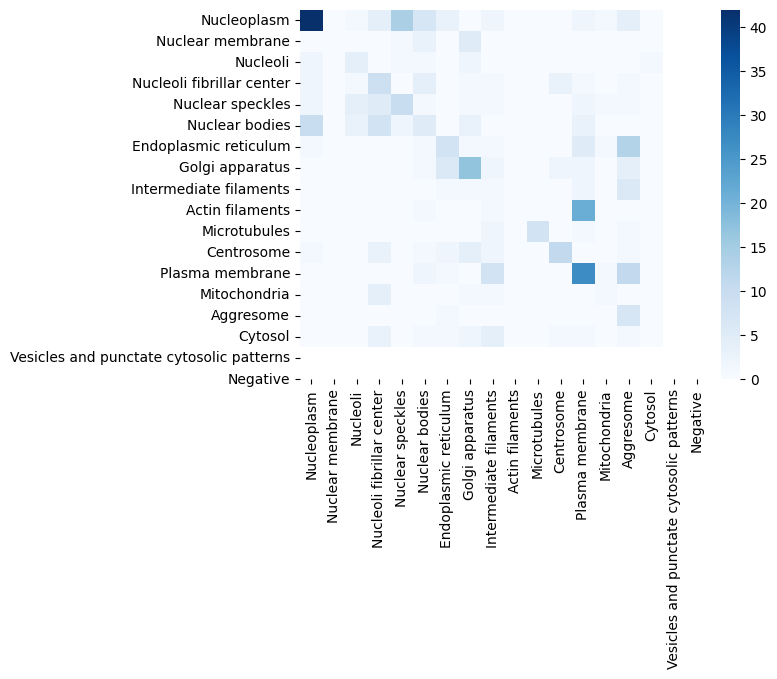

In [ ]:
y_test = np.array(y_test2.iloc[1600:2000,2])
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
columns = ["Nucleoplasm",
                    "Nuclear membrane",
                    "Nucleoli",
                    "Nucleoli fibrillar center",
                    "Nuclear speckles",
                    "Nuclear bodies",
                    "Endoplasmic reticulum",
                    "Golgi apparatus",
                    "Intermediate filaments",
                    "Actin filaments",
                    "Microtubules",
                    "Centrosome",
                    "Plasma membrane",
                    "Mitochondria",
                    "Aggresome",
                    "Cytosol",
                    "Vesicles and punctate cytosolic patterns",
                    "Negative"]
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, xticklabels=columns, yticklabels=columns, cmap=plt.cm.Blues)
# plt.savefig("/content/drive/MyDrive/data/CONF_MAT.png", bbox_inches = 'tight')
plt.show()

In [ ]:

reconstructed_model = models.load_model("my_model.keras")


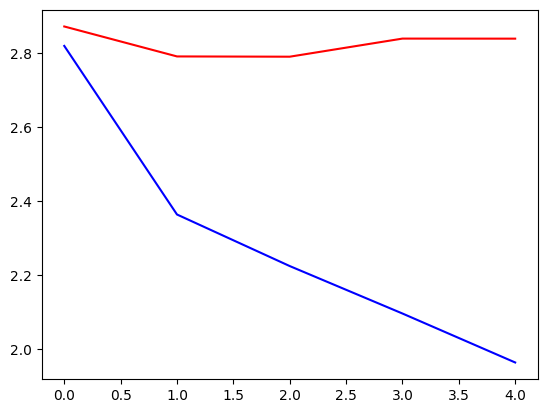

In [ ]:
history_dict = history1.history
org_loss =history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(org_loss, 'b-', label ='Training ')
plt.plot(val_loss, 'r-', label ='val ')
plt.plot()
plt.show()

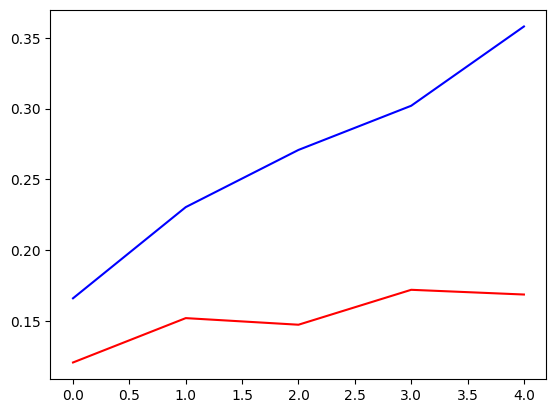

In [ ]:
history_dict = history1.history
org_loss =history_dict['accuracy']
val_loss = history_dict['val_accuracy']
plt.plot(org_loss, 'b-', label ='Training ')
plt.plot(val_loss, 'r-', label ='val ')
plt.plot()
plt.show()

In [ ]:
#ResNet50

In [ ]:
resnet = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights="imagenet",))
model.add(Dense(18, activation = 'softmax'))
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 18)                36882     
                                                                 
Total params: 23624594 (90.12 MB)
Trainable params: 36882 (144.07 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
with tf.device('/GPU:0'):
    history1 = model.fit(x=X_train_new, y=y_train_one_hot, validation_data=(X_val, y_val_one_hot),epochs=50,batch_size=10,verbose=1)

In [ ]:
#ResNet50V2

In [ ]:
base_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers[:-10]:
  layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation="relu")(x)
predictions = Dense(18, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'AUC', 'Precision', 'Recall', 'F1Score'])

In [ ]:
with tf.device('/GPU:0'):
  history1 = model.fit(X_train, y_train_one_hot, validation_data = (X_val_new, y_val_one_hot), epochs = 20, batch_size = 8, verbose = 1)

In [ ]:
#DenseNet169 with growth rate

In [ ]:
base_model = DenseNet169(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base_model.layers[:-20]:
  layer.trainable = False

x = base_model.output

x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
growth_rate = 16
def dense_block(x, filters):
  for _ in range(4):
    y = BatchNormalization()(x)
    y = ReLU()(y)
    y = Conv2D(filters, kernel_size=3, padding="same")(y)
    x = concatenate([x, y])
    filters += growth_rate
  return x

x = dense_block(x, 32)
x = dense_block(x, 64)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(18, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
with tf.device('/GPU:0'):
  history1 = model.fit(x =X_train_new, y= y_train_one_hot , validation_data=(X_val,y_val_one_hot), epochs=50, batch_size=10,  verbose=1, callbacks=[early])

In [ ]:
#DENSENET169 WITH TIMESERIES SEQUENCE

In [ ]:
length = 5
batch_size = 4
from keras.preprocessing.sequence import TimeseriesGenerator
train_sequences = TimeseriesGenerator(X_train_new, y_train_one_hot, length=length, batch_size=batch_size)
test_sequences = TimeseriesGenerator(X_val_new, y_val_one_hot, length=length, batch_size=batch_size)

In [ ]:
# Load pre-trained DenseNet model without the top layer
DenseNet_model = tf.keras.applications.DenseNet169(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in DenseNet_model.layers[:-10]:
  layer.trainable = False

model = Sequential()
model.add(TimeDistributed(DenseNet_model, input_shape=(5, 224, 224, 3)))
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dropout(0.5)))
model.add(GlobalAveragePooling1D(name="GlobalAveragePooling1D"))
model.add(BatchNormalization(name="BatchNormalization"))
model.add(Dropout(0.5))

model.add(Dense(1024, activation="relu"))
model.add(Dense(18, activation="softmax"))

model.compile(optimizer = SGD(learning_rate=0.00001), loss = "categorical_crossentropy" ,
              metrics = ['accuracy', 'AUC','F1Score','Recall', 'Precision'])
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
with tf.device('/GPU:0'):
  hist = model.fit(train_sequences,validation_data = test_sequences,epochs=10,callbacks=[early])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_all_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_val_all_one_hot = encoder.fit_transform(y_val.values.reshape(-1, 1))

In [ ]:
#VGG16

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-8]:
  layer.trainable = False
x = base_model.output
x = Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
x = Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(units=1024, activation="relu")(x)
x = Dense(units=512, activation="relu")(x)

x = Dropout(0.5)(x)
predictions = Dense(18, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy', 'AUC', 'Precision', 'Recall', 'F1Score'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
with tf.device('/GPU:0'):
    history1 = model.fit(x=X_train_final, y=y_train_all_one_hot, validation_data=(X_val_final, y_val_all_one_hot),epochs=50,batch_size=10,verbose=1)

In [ ]:
history_dict = hist.history1
columns = ['Train Loss','Train Accuracy',	'Train Precision','Train Recall','Train F1-Score','Validation Loss','Validation Accuracy','Validation Precision',	'Validation Recall',	'Validation F1-Score']
history_data = pd.Data_Frame(history_dict, columns= columns)
history_data = history_data.insert(loc=0, column='Epoch', value=range(1,len(hist)+1))
history_data.to_csv('/content/drive/MyDrive/data/history1.csv')

In [ ]:
history_data = pd.read_csv('/content/drive/MyDrive/data/history1.csv')

In [ ]:
df = history_data
sns.set_style("whitegrid")
sns.lineplot(data=df, x= 'Epoch', y= 'Train Accuracy', label='Train' )
sns.lineplot(data=df, x= 'Epoch', y= 'Validation Accuracy', label='Validation' )
# plt.legend(labels=["A", "B"])
plt.title('Model Accuracy')
plt.ylabel("Accuaracy")
plt.savefig("/content/drive/MyDrive/data/accurac.png")
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.lineplot(data=df, x= 'Epoch', y= 'Train Loss', label='Train' )
sns.lineplot(data=df, x= 'Epoch', y= 'Validation Loss', label='Validation' )
# plt.legend(labels=["A", "B"])
plt.title('Model Loss')
plt.ylabel("loss")
plt.savefig("/content/drive/MyDrive/data/loss.png")
plt.show()

In [ ]:
sns.lineplot(data=df, x= 'Epoch', y= 'Train Precision', label='Train' )
sns.lineplot(data=df, x= 'Epoch', y= 'Validation Precision', label='Validation' )
# plt.legend(labels=["A", "B"])
plt.ylabel("Precision")
plt.title('Model Precision')
plt.savefig("/content/drive/MyDrive/data/precision.png")
plt.show()

In [ ]:
sns.lineplot(data=df, x= 'Epoch', y= 'Train Recall', label='Train' )
sns.lineplot(data=df, x= 'Epoch', y= 'Validation Recall', label='Validation' )
# plt.legend(labels=["A", "B"])
plt.ylabel("Recall")
plt.title('Model Recall')
# plt.savefig("/content/drive/MyDrive/data/recall.png")
plt.show()

In [ ]:
sns.lineplot(data=df, x= 'Epoch', y= 'Train F1-Score', label='Train' )
sns.lineplot(data=df, x= 'Epoch', y= 'Validation F1-Score', label='Validation' )
# plt.legend(labels=["A", "B"])
plt.title('Model F1-Score')
#plt.ylabel("F1Score")
plt.savefig("/content/drive/MyDrive/data/F1score.png")
plt.show()

In [ ]:
#MAKEING PREDICTION WITH VGG16

In [ ]:
test_set = np.load('/content/drive/MyDrive/data/test.npy', mmap_mode = 'r')
y_test = pd.read_csv('/content/drive/MyDrive/data/test.csv')
y_test =np.array(y_test.iloc[:,2])
y_pred =np.array([])
for i in test_set:
  predictions = model.predict(np.expand_dims(i, axis=0))
  predicted_labels = np.argmax(predictions, axis=1)
  label = predicted_labels[0]
  if label >= 11:
    print(label+1)
    y_pred = np.append(y_pred, label+1)
  else:
    y_pred = np.append(y_pred, label)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ["Nucleoplasm",
                    "Nuclear membrane",
                    "Nucleoli",
                    "Nucleoli fibrillar center",
                    "Nuclear speckles",
                    "Nuclear bodies",
                    "Endoplasmic reticulum",
                    "Golgi apparatus",
                    "Intermediate filaments",
                    "Actin filaments",
                    "Microtubules",
                    "Centrosome",
                    "Plasma membrane",
                    "Mitochondria",
                    "Aggresome",
                    "Cytosol",
                    "Vesicles and punctate cytosolic patterns",
                    "Negative"]
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, xticklabels=columns, yticklabels=columns, cmap=plt.cm.Blues)
plt.savefig("/content/drive/MyDrive/data/CONF_MAT.png", bbox_inches = 'tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(X_test[0], cv2.COLOR_BGR2RGB ))
plt.axis('off')
plt.title(f"Actual {labels[y_test[0]]}\n Predicted {labels[y_pred[0]]}")

fig.add_subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(X_test[1], cv2.COLOR_BGR2RGB ))
plt.title(f"Actual {labels[y_test[1]]}\n Predicted {labels[y_pred[1]]}")
plt.axis('off')

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(X_test[3], cv2.COLOR_BGR2RGB ))
plt.title(f"Actual {labels[y_test[3]]}\n Predicted {labels[y_pred[3]]}")
plt.axis('off')

fig.add_subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(X_test[4], cv2.COLOR_BGR2RGB ))
plt.title(f"Actual {labels[y_test[4]]}\n Predicted {labels[y_pred[4]]}")
plt.axis('off')